# Homework 2
This homework has been assigned in date 31st of October 2024.
We have been required to complete a series of tasks on a *basket-item* kind dataset:
1. Compute the frequency of each product. Then print in a bar plot the top 20. In
the first axis you need to specify the product name, in the seconf one the
product frequency.
2. Compute the frequency of each level 3 and level 4. Then print the top 5 as the
point 1.
3. Apply the APRIORI algorithm.

We have been offered a dataset of transactions owned by a third party, as I have no rights over it, I assume we are not allowed to share, please reach out our professors of *Introduction to Data Mining* at [this link](https://web.dmi.unict.it/courses/l-31/course-units/?seuid=8EAB2D3A-4281-40F4-83A0-C6B007577BA2) if interested.

### Notes
We have been required to follow an object-oriented approach, my work doesn't stricly follow this requirements as a jupyter notebook is provided.

I did my best not to put any verbose or annoying code in this notebook.


### Loading environment
We use `python-dotenv` package to load environment variables from a `.env` file, in particular the variable `TASK_DATASET_FILE` which, with no further explaination, points to our dataset file.

In [1]:
import os
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

dataset_file_path = os.getenv('TASK_DATASET_FILE_PATH')
print("Our dataset path is: %s" % dataset_file_path)

Our dataset path is: /home/marco/Scrivania/uni/datamining/lab-data-mining/homework2/nogit/AnonymizedFidelity.csv


### Loading our dataset
Due to the large size of our raw dataset file, a series of facilities have been implemeneted to make my work easier, in particular:
- A **Preprocessor** class has been made, it is its responsibility to:
  - Select the features we are interested in.
  - Drop invalid records from our dataset.
  - Split our dataset into three different dataframes, **items**, **categories**, **transactions**.
    - Of **items**, to ease visualization, part of description which holds the product's id has been trimmed out, as it's unnecessary.
- A **CacheManager** and its **Cache** product have been implemented:
  - A **CacheManager's** responsibility is to cache **Preprocessor's** results, so that iteration times, memory and computing resources are optimized.
  - **Cache** is the result of a **CacheManager**, it holds the three dataset needed.
  - Python's library **pickle**'s format has been used to serialize our dataframes as it preserves Panda's DataFrame informations. It is imperative you must create your own cache files through running this notebook, as **pickly** files can be used with malicious intent by third party users.

Follows the code that loads or dataset:

In [2]:
from src.cache import CacheManager
cache = CacheManager(dataset_file_path).get_cache()

Our cache object the three dataframes I considered interesting to extract to complete the homework:


#### Items
`cache.items` holds the data about the items present in the original dataset.

In [3]:
cache.items

,descr_prod,liv1,liv2,liv3,liv4
cod_prod,,,,,
1004624,ZAPPALA LATTE UHT P/S LT.1,1,118,11802,1180203
1090781,CUKI TEGLIA EXTRA S97 8POR.X2,5,504,50404,5040402
3000305,TEST SFOGLIA RETT.S/O.PAL230G,3,308,30802,3080203
3000397,*TEST P.U.GRAM.TEST N/ANT G500,1,115,11506,1150601
3000226,TEST PASSATA EX.FINE MAR.ML700,1,121,12104,1210402
...,...,...,...,...,...
1040108,*PRITT CORRETTORE PEN ML.8 x2,55,5501,550105,55010501
1130814,OSELLA LINEA GR.125,3,301,30106,3010601
1132653,NT FOOD MUESLI NOCC&MAND GR300,1,101,10108,1010804


#### Categories
`cache.categories` holds the data about the categories of the original dataset, which should originate from a tree structure, although it is necessary to reconstruct for this task, thus this dataframe just holds the needed informations for each category, regardless of its level or parent.

In [4]:
cache.categories

,descr
id,
1,DROGHERIA ALIMENTARE
5,CURA CASA
3,FRESCO
9,MACELLERIA
21,NON FOOD
...,...
2040103,COGNAC
6090101,EDT UOMO
57010301,RESINA


#### Transactions
`cache.transactions` holds the transactions from the original files, the data has been pruned down to the two needed features:
- Transaction id ( *scontrino_id* ).
- Item id ( *cod_prod* )

In [5]:
cache.transactions

,cod_prod
scontrino_id,
52597232,1004624
52597232,1090781
52597232,3000305
52597232,3000397
52597232,3000226
...,...
62224004,1037398
62224004,1055261
62228225,3501904


## Task 1
### Frequency of each product
To compute the data frame of frequencies of each product, we have to count singles `cod_prod` from **transaction's** data frame.

As I preferred to keep the occurrence counts as I found it easier to understand, I'm going to calculate the requirred frequency by dividing each result's *count* column to the *transaction's* data frame size.

Then the result is joined with **item's** data frame, of which I select only `descr_prod`, the product's description, as we are required to use as labels in the next plot.

Follows the code and the data which holds the frequency of each product.

In [6]:
frequent_items_df = (
    cache.transactions['cod_prod'].value_counts(sort= True).to_frame()
    .assign(frequency = lambda x: x['count'] / cache.transactions.size )
    .join(cache.items[['descr_prod']], 'cod_prod')
)

frequent_items_df

,count,frequency,descr_prod
cod_prod,,,
1090011,52746,2.726769e-02,SHOPPERS TEST BIO 35X65 P.500
1101882,34931,1.805801e-02,PITITTU PANE SEM.RIM.GRANO DUR
1028794,11996,6.201480e-03,F.BANANE CHIQUITA EXTRA
1012222,10789,5.577506e-03,M.POLLO PETTO A FETTE
1003475,10335,5.342805e-03,GALBANI PROSC.COT.FETTAGOLOSA
...,...,...,...
1104142,1,5.169623e-07,PERLA PALLONCINO MYLAR N.4
1035472,1,5.169623e-07,ORTENSIA V.22
1065758,1,5.169623e-07,*APPAGE BICCH.CARTON.20CL X10


Follows the requested bar plot.

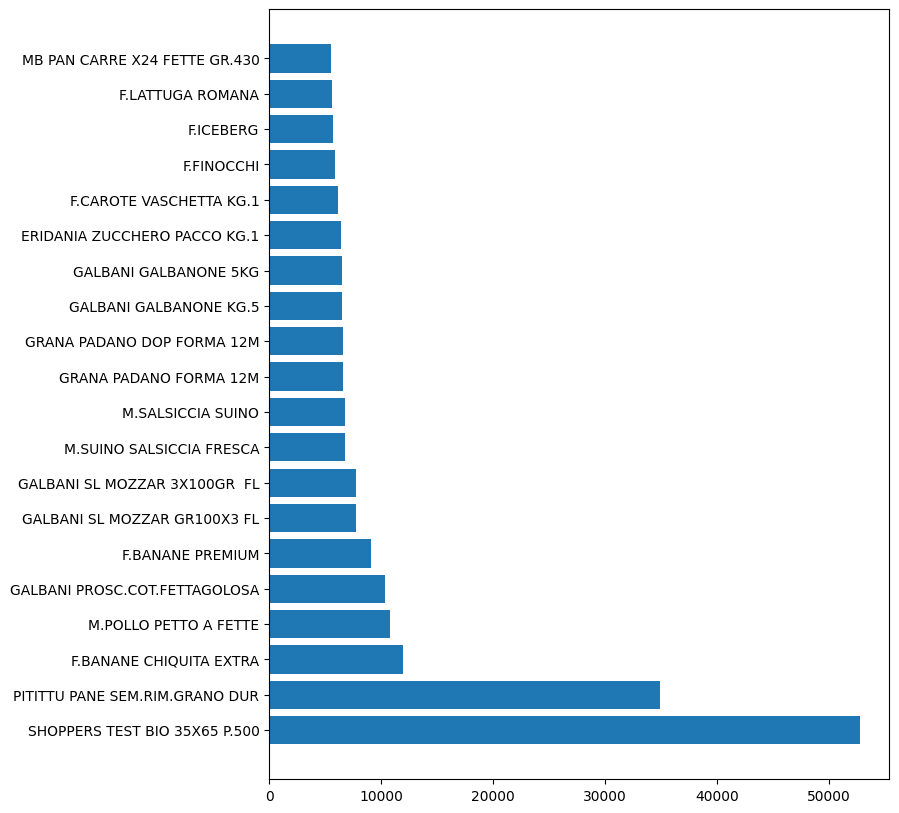

In [7]:
import matplotlib.pyplot as plt

# just select twenty of, as we are required
most_frequent_items_df = frequent_items_df.head(20)
# draw a bigger figure
plt.figure(figsize=(8,10))
# use barh for horizontal bars, which I found a better fit here than vertical ones
plt.barh(most_frequent_items_df['descr_prod'], most_frequent_items_df['count'])
plt.show()

## Task 2
### Frequency of categories of level 3
To compute the frequency of categories in level 3, it is needed to:
1. Select the transaction data frame
2. Join the data frame with items, but of items only select `liv3`
3. Compute the `value_counts` of `liv3`.
4. Join with *categories* data frame.


In [8]:
frequent_level3_df = (
    cache.transactions
    .join(cache.items[['liv3']], 'cod_prod' )
    ['liv3'].value_counts()
    .to_frame()
    .assign(frequency = lambda x: x['count'] / cache.transactions.size )
    .join(cache.categories)
)

frequent_level3_df

,count,frequency,descr
liv3,,,
30604,112498,5.815723e-02,SALUMI BANCO TAGLIO
30115,87722,4.534897e-02,FORMAGGI BANCO TAGLIO
90101,64753,3.347486e-02,CARNE ROSSA
11502,63138,3.263997e-02,PASTA DI SEMOLA
210101,60314,3.118006e-02,MATERIALE DI CONSUMO
...,...,...,...
61003,1,5.169623e-07,OCCHI
10608,1,5.169623e-07,ALTRE CONSERVE ANIMALI
920101,1,5.169623e-07,PRODOTTI COLLECTION


Follows the bar plot of the top 5 categories of level 3:

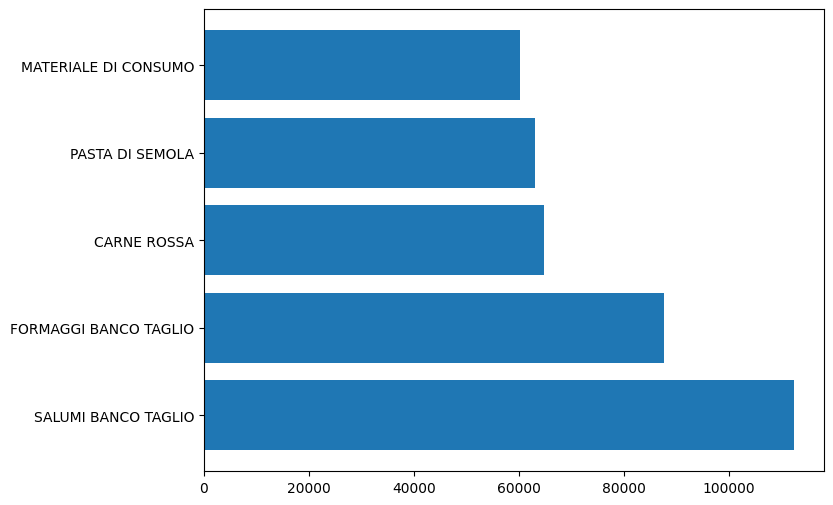

In [9]:
top_frequent_level3_df = frequent_level3_df.head(5)

plt.figure(figsize=(8,6))
plt.barh(top_frequent_level3_df['descr'], top_frequent_level3_df['count'])
plt.show()

### Frequency of categories of level 4
It is the same as [before](#frequency-of-categories-of-level-3), we extract the most frequent categories of level 4:

In [10]:
frequent_level4_df = (
    cache.transactions
    .join(cache.items[['liv4']], 'cod_prod' )
    ['liv4'].value_counts()
    .to_frame()
    .assign(frequency = lambda x: x['count'] / cache.transactions.size )
    .join(cache.categories)
)

frequent_level4_df

,count,frequency,descr
liv4,,,
21010103,59921,3.097690e-02,SHOPPERS
24010102,52869,2.733128e-02,PANETTERIA PANE
3010102,46633,2.410750e-02,LATTE VACCINO
3060402,41212,2.130505e-02,PROSCIUTTO COTTO
9010101,36464,1.885051e-02,BOVINO
...,...,...,...
24010104,1,5.169623e-07,PANETTERIA BIBITE
1060800,1,5.169623e-07,ALTRE CONSERVE ANIMALI
9030101,1,5.169623e-07,BOVINO


And we plot them the same:

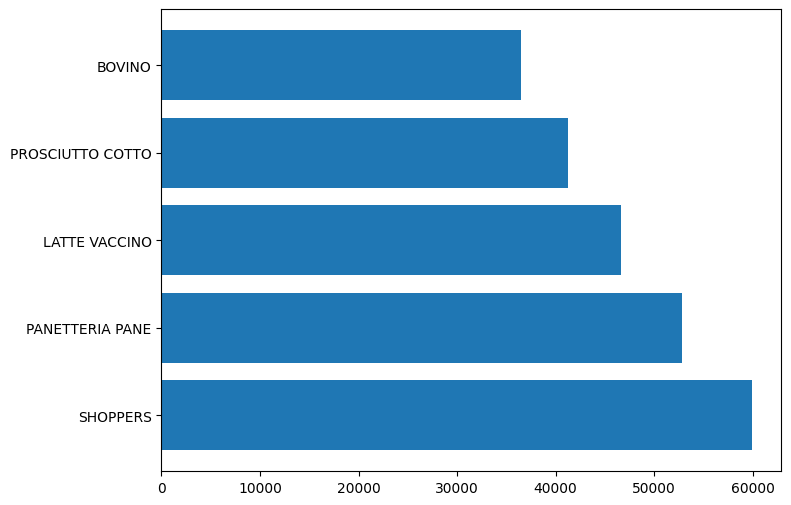

In [11]:
top_frequent_level4_df = frequent_level4_df.head(5)

plt.figure(figsize=(8,6))
plt.barh(top_frequent_level4_df['descr'], top_frequent_level4_df['count'])
plt.show()

## Task 3
It is required to apply **Apriori** to our transactions.

First we will define a *minimum support*, which is the minimum frequency an item must occur in our dataset of transactions.   
We select our *supported items* by selecting those frequent items which have frequency greater than *min support*:

In [12]:
min_support = 0.0003

supported_items_df = frequent_items_df[ frequent_items_df['frequency'] > min_support ]
supported_items_df


,count,frequency,descr_prod
cod_prod,,,
1090011,52746,0.027268,SHOPPERS TEST BIO 35X65 P.500
1101882,34931,0.018058,PITITTU PANE SEM.RIM.GRANO DUR
1028794,11996,0.006201,F.BANANE CHIQUITA EXTRA
1012222,10789,0.005578,M.POLLO PETTO A FETTE
1003475,10335,0.005343,GALBANI PROSC.COT.FETTAGOLOSA
...,...,...,...
1000219,583,0.000301,MB ABBRACCI GR.350 P
1001080,582,0.000301,FERRERO DUPLO NOCCIOLATO T1
1040027,581,0.000300,FOXY ASSO ULTRA 2V MAXI X2


Of which, we need only the *product's id*, then get the transaction records of these products.

In [13]:
supported_trx_df = cache.transactions[ cache.transactions['cod_prod'].isin(supported_items_df.index) ]
supported_trx_df

,cod_prod
scontrino_id,
52597232,1004624
52597232,1012141
52597232,1012128
52597232,1012222
52597233,1090346
...,...
62224003,1021454
62224003,1101882
62224004,1076522


We are going to use **mlxtend** library to apply Apriori.  
In order to do so, we must first create a cross reppresentation of our transactions:

In [14]:
cross_trx_df = (
    pd.crosstab(supported_trx_df.index, supported_trx_df['cod_prod'])
    .astype('bool')
)
cross_trx_df

cod_prod,1000137,1000138,1000152,1000169,1000200,1000210,1000219,1000273,1000274,1000275,...,3500758,3501012,3501143,3501312,3501558,3501601,3501921,5003679,5003683,5058456
row_0,,,,,,,,,,,,,,,,,,,,,
49074056,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49074176,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49074638,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49074665,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
49074722,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68476471,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
68476506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
68476546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Then we run *mlxtend's apriori* implementation, with `low_memory=True`, as my first run happily ended with: 
> Unable to allocate 40.6GiB for an array with shape **(BIG SHAPE)**...

Documentation claims this setting is slower, but I doubt there are many consumer grade devices with that much spare RAM, so to compute apriori with a very small support one has to accept compromises.

In [15]:
from mlxtend.frequent_patterns import apriori

frequent_baskets_df = apriori(cross_trx_df, min_support=min_support, low_memory=True, verbose=True, use_colnames=True)
frequent_baskets_df

Processing 1120 combinations | Sampling itemset size 43


,support,itemsets
0,0.009951,(1000137)
1,0.011553,(1000138)
2,0.004366,(1000152)
3,0.004989,(1000169)
4,0.011265,(1000200)
...,...,...
19231,0.000445,"(1101882, 1090011, 1101884, 1102085)"
19232,0.000794,"(1101882, 1090011, 1102085, 1101886)"
19233,0.000411,"(1102408, 1101882, 1090011, 1101886)"
19234,0.000301,"(1102408, 1101882, 1090011, 1101936)"


So far, mlxtend's apriori implementation only returns a support metric of single baskets, to extract association rules, we do as follow:

In [58]:
from mlxtend.frequent_patterns import association_rules
rules_df = association_rules(frequent_baskets_df, metric="confidence", min_threshold=.7)

# select a restricted set of features
rules_df = rules_df[['antecedents','consequents','support','confidence','lift']]
rules_df

,antecedents,consequents,support,confidence,lift
0,"(1000200, 1101886)",(1101882),0.000342,0.819672,3.428609
1,"(1000344, 1102085)",(1101882),0.000308,0.775862,3.245356
2,"(1000801, 1102085)",(1101882),0.000315,0.851852,3.563214
3,"(1001068, 1102085)",(1101882),0.000329,0.842105,3.522445
4,"(1001109, 1101886)",(1101882),0.000342,0.806452,3.373309
...,...,...,...,...,...
151,"(1102085, 1090011, 1021453)",(1101882),0.000322,0.734375,3.071820
152,"(1028794, 1090011, 1101886)",(1101882),0.000595,0.707317,2.958639
153,"(1046688, 1082394, 1090011)",(1099668),0.000424,0.729412,16.091883
154,"(1046688, 1082394, 1099668)",(1090011),0.000424,0.738095,2.044616


Let's also include product descriptions:

In [ ]:
rules_df['antecendents_descr'] = rules_df['antecedents'].map( lambda ants: tuple(cache.items['descr_prod'].loc[ants]))
rules_df['consequents_descr'] = rules_df['consequents'].map( lambda cons: tuple(cache.items['descr_prod'].loc[cons]))
rules_df = rules_df.sort_values('confidence', ascending=False)

rules_df

,antecedents,consequents,support,confidence,lift,antecendents_descr,consequents_descr
20,"(1003481, 1101886)",(1101882),0.000397,0.935484,3.913039,"(GALBANI SALAME NAPOLI DOLCE1,5, PITITTU PANE ...","(PITITTU PANE SEM.RIM.GRANO DUR,)"
39,"(1102085, 1013894)",(1101882),0.000349,0.864407,3.615730,"(PITITTU PANINI AL LATTE, BELLAERA PROVOLA RAG...","(PITITTU PANE SEM.RIM.GRANO DUR,)"
2,"(1000801, 1102085)",(1101882),0.000315,0.851852,3.563214,"(VERA ACQUA FRIZZANTE CL. 50, PITITTU PANINI A...","(PITITTU PANE SEM.RIM.GRANO DUR,)"
143,"(1102085, 1090011, 1012157)",(1101882),0.000301,0.846154,3.539380,"(PITITTU PANINI AL LATTE, SHOPPERS TEST BIO 35...","(PITITTU PANE SEM.RIM.GRANO DUR,)"
98,"(1065883, 1102085)",(1101882),0.000589,0.843137,3.526762,"(LIBERAMENTE PROSC.COTTO GR.110, LIBERAMENTE P...","(PITITTU PANE SEM.RIM.GRANO DUR,)"
...,...,...,...,...,...,...,...
130,"(1102085, 1102047)",(1101882),0.000691,0.701389,2.933842,"(PITITTU PANINI AL LATTE, M.PREPARATI NS. PROD...","(PITITTU PANE SEM.RIM.GRANO DUR,)"
62,"(1101884, 1021453)",(1101882),0.000992,0.700483,2.930053,"(PITITTU PANE INTEGRALE, F.LATTUGA ROMANA)","(PITITTU PANE SEM.RIM.GRANO DUR,)"
11,"(1070682, 1003412)",(1090011),0.000383,0.700000,1.939087,"(MAJOR PIATTO RIUT.PIANO PZ.35, GALBANI GALBAN...","(SHOPPERS TEST BIO 35X65 P.500,)"
138,"(1014282, 1003475, 1001207)",(1090011),0.000383,0.700000,1.939087,"(OLIVE NERE SUP.COLOSSAL KG13, OLIVE NERE SUP....","(SHOPPERS TEST BIO 35X65 P.500,)"


We finally save the found rules into file `rules.nogit.csv`:

In [63]:
rules_to_csv_df = rules_df

# use tuples instead of frozenset
rules_to_csv_df['antecedents'] = rules_df['antecedents'].apply( lambda ants : tuple(ants))
rules_to_csv_df['consequents'] = rules_df['consequents'].apply( lambda cons : tuple(cons))

rules_df.to_csv('rules.nogit.csv')